In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('http://iali.in/datasets/Social_Network_Ads.csv')

In [3]:
dataset.sample(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
122,15724423,Female,40,75000,0
95,15709441,Female,35,44000,0
182,15694288,Female,32,117000,1
21,15736760,Female,47,49000,1
112,15619653,Male,38,61000,0
133,15638963,Female,21,68000,0
74,15592877,Male,32,18000,0
203,15809347,Female,41,71000,0
25,15631159,Male,47,20000,1
132,15725660,Male,30,87000,0


In [4]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [7]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)


[Text(164.145, 209.07692307692307, 'X[0] <= 42.5\nentropy = 0.443\nsamples = 320\nvalue = [214, 106]'),
 Text(100.44000000000001, 192.35076923076923, 'X[1] <= 90500.0\nentropy = 0.26\nsamples = 234\nvalue = [198, 36]'),
 Text(52.080000000000005, 175.62461538461537, 'X[0] <= 36.5\nentropy = 0.076\nsamples = 201\nvalue = [193, 8]'),
 Text(44.64, 158.89846153846153, 'entropy = 0.0\nsamples = 138\nvalue = [138, 0]'),
 Text(59.52, 158.89846153846153, 'X[1] <= 83500.0\nentropy = 0.222\nsamples = 63\nvalue = [55, 8]'),
 Text(52.080000000000005, 142.1723076923077, 'X[1] <= 72500.0\nentropy = 0.177\nsamples = 61\nvalue = [55, 6]'),
 Text(14.88, 125.44615384615385, 'X[1] <= 70500.0\nentropy = 0.046\nsamples = 42\nvalue = [41, 1]'),
 Text(7.44, 108.72, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(22.32, 108.72, 'X[0] <= 39.5\nentropy = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(14.88, 91.99384615384615, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(29.76, 91.99384615384615, 'X[0

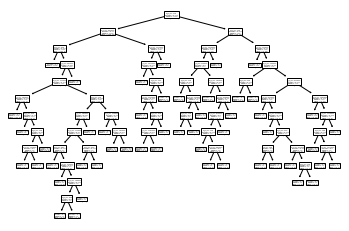

In [8]:
tree.plot_tree(clf)

In [9]:
y_pred = clf.predict(x_test)

In [10]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.8875

In [12]:
from sklearn.metrics import classification_report

classes=['0','1']

classification_report(y_test,y_pred,target_names=classes)

'              precision    recall  f1-score   support\n\n           0       0.89      0.91      0.90        43\n           1       0.89      0.86      0.88        37\n\n    accuracy                           0.89        80\n   macro avg       0.89      0.89      0.89        80\nweighted avg       0.89      0.89      0.89        80\n'

In [13]:
df= pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
75,1,1
76,1,0
77,1,1
78,1,0


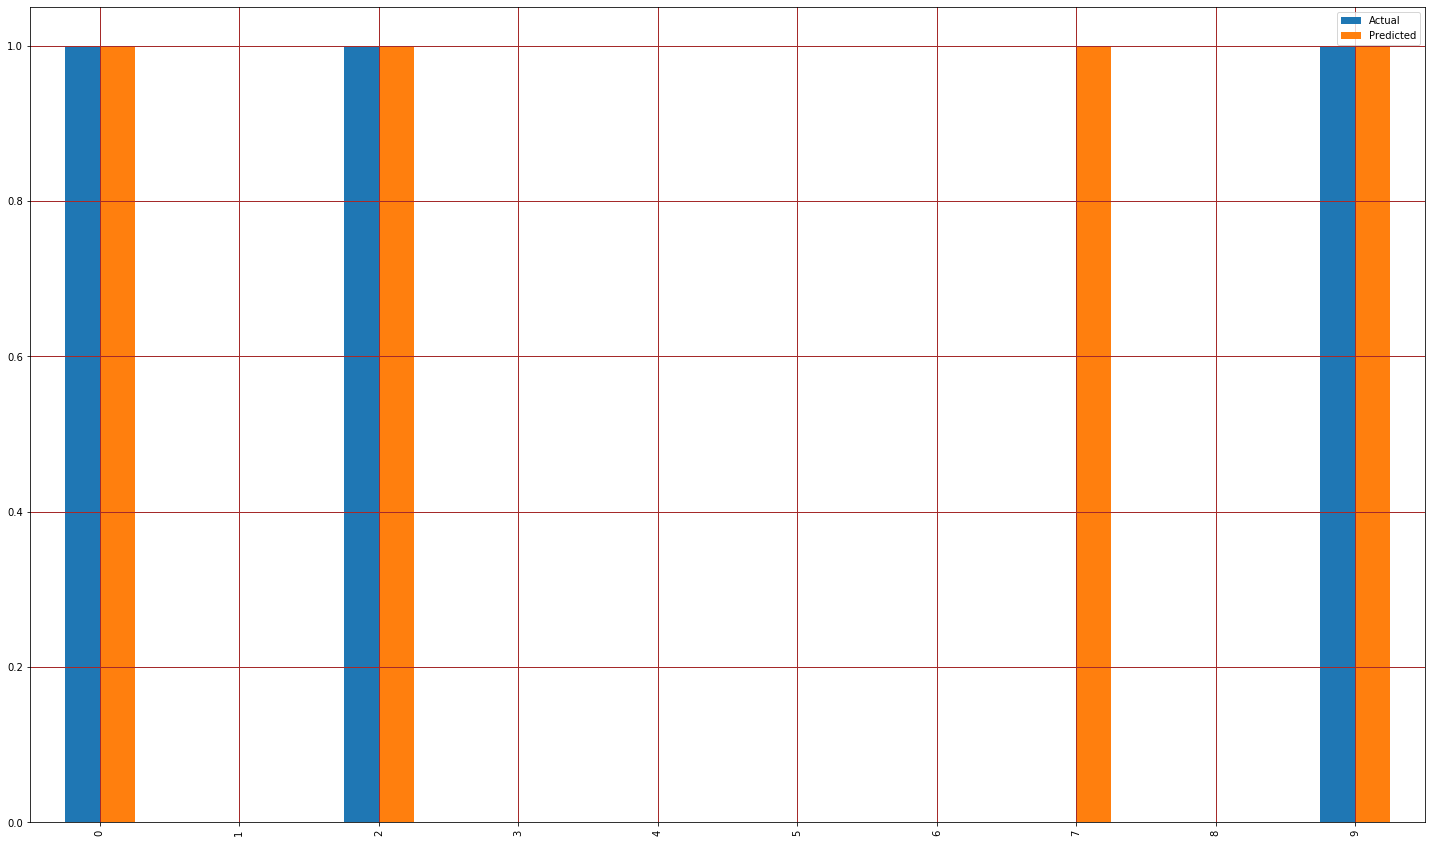

In [14]:
import matplotlib.pyplot as plt

df1 = df.head(10)
df1.plot(kind='bar', figsize=(25,15))
plt.grid(which='major', linestyle='-',linewidth='1', color="brown")
plt.grid(which='minor',linestyle=':',linewidth='1', color="purple")
plt.show()